**Name and Matrikel number**

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Import the prepared functions
from numerov import solve_schroedinger, symmetric

# 1D Atom

In this project, we will try to mimic atoms and molecules in 1D using a Pöschl–Teller potential:

In [35]:
def poeschl_teller(xs, lam=1, a=1):
    """Poeschl-Teller potential.

    See https://en.wikipedia.org/wiki/Pöschl–Teller_potential
    """
    return -lam * (lam + 1) * a**2 / (2 * np.cosh(a * xs) ** 2)

In [36]:
# Input parameters
N = 2000  # Number of grid points
xmax = 25  # Extent of the grid

# Preparation of the grid
xs = np.linspace(0, xmax, N)
h = xs[1] - xs[0]

# ...and the potential
V = poeschl_teller(xs, lam=2)

<div class="alert alert-block alert-info">
<b>1st Task:</b> Plot the potential and the ground-state wave function. 
</div> 

Questions so far:
- Why does small N give such astonishinly bad results? (changing N = 500 -> N = 5000 gave zero nodes)
- Why is this only a problem in one implementation?
- Why is the upper bound criterion based on the number of nodes and the lower bound criterion on the behaviour of the wavefunction 
- What is the meaning of k in the schrödinger solve function?
- How are the psi0 -psi3 with the right number of nodes if their paritys should not allow that



In [39]:
k = 0 # Ellipses (...) indicate places where you have to add code
gerade = True
Etry = V.min()

u, E, dE, n_nodes = solve_schroedinger(V, k, gerade, h, Etry=Etry)
print(f"tried E={Etry:.1f} got n_nodes={n_nodes} and E={E:.2f}")

tried E=-3.0 got n_nodes=0 and E=-2.00


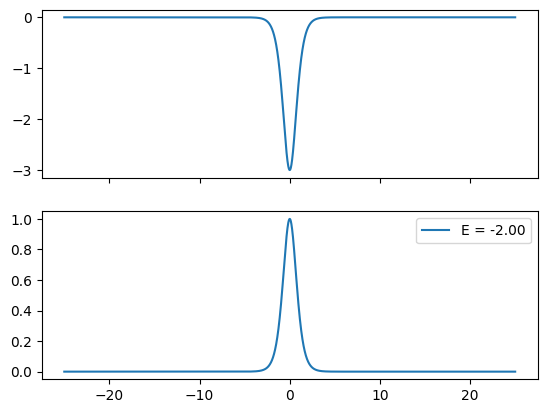

In [40]:
xg = symmetric(xs, gerade=False)
full_u = symmetric(u, gerade=gerade)
full_V = symmetric(V, gerade=True)
fix, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(xg, full_V)

axs[1].plot(xg, full_u, label=f"E = {E:.2f}")
axs[1].legend()

<div class="alert alert-block alert-info">
<b>Calculate</b> the normalized wave functions for the ground state and the first excited state, psia0 and psia1.<br>
<b>Check</b> that they are normalized and plot them.
</div>

In [ ]:
xg = symmetric(xs, gerade=False)

u, Ea0, dE, n_nodes = solve_schroedinger(V, k=0, gerade=True, h=h, Etry=V.min())
psia0 = ..
...

In [ ]:
norm0 = ...
...

In [ ]:
fix, axs = plt.subplots(1, 1)
...

# 1D Molecules

Next, we look into a simplified model for $H_2$. To this end, we place two atomic potentials at a distance $R$
\begin{equation}
    V(x) = V_{at}\left(x-\frac{R}{2}\right) + V_{at}\left(x+\frac{R}{2}\right).
\end{equation}
Obviously, for large $R$ we get two separate "atoms".

In [ ]:
# Input parameters
N = 2000  # Number of grid points
xmax = 2  # Extent of the grid

R = 4  # Distance

# Preparation of the grid
xs = np.linspace(0, xmax, N)
h = xs[1] - xs[0]

# ...and the potential
V = poeschl_teller(xs - R / 2, lam=2) + poeschl_teller(xs + R / 2, lam=2)

In [ ]:
# Let's look at some state as before
k = 0
gerade = True
Etry = V.min()

u, E, dE, n_nodes = solve_schroedinger(V, k, gerade, h, Etry=Etry)
print(f"tried E={Etry:.1f} got n_nodes={n_nodes} and E={E:.2f}")

In [ ]:
fix, axs = plt.subplots(2, 1, sharex=True)

axs[0].plot(xs, V, color="black")
axs[0].axhline(y=E, color="grey")
axs[0].set_ylabel(r"$V$")
axs[0].set_xlim((0, 5))
axs[0].set_ylim((V.min() - 0.1, 0.5))

axs[1].plot(xs, u, label=f"E={E:.1f}")
axs[1].set_xlabel(r"$x$")
axs[1].set_ylabel(r"$u$")

plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Have</b> a look at some different distances. What do you conclude?
</div>

<span style="color:red">**Your Answer**</span>

In [ ]:
# As before, we want to extend the wave functions to the whole x-axis and normalize them
xg = symmetric(xs, gerade=False)

# Here, we only look at the first two
u, E0, dE, n_nodes = solve_schroedinger(V, k=0, gerade=True, h=h, Etry=V.min())
psi0 = symmetric(u, gerade=True)
psi0 /= np.sqrt(np.trapz(psi0 * psi0, dx=h))

u, E1, dE, n_nodes = solve_schroedinger(V, k=0, gerade=False, h=h, Etry=V.min())
psi1 = symmetric(u, gerade=False)
psi1 /= np.sqrt(np.trapz(psi1 * psi1, dx=h))

In [ ]:
fix, axs = plt.subplots(1, 1)

# Plot the wave functions
axs.plot(xg, psi0, label=f"$n=0: E={E0:.2f}$", linewidth=2)
axs.plot(xg, psi1, label=f"$n=1: E={E1:.2f}$", linewidth=2)

# Compare with atomic ground-state
axs.plot(xg + R / 2, psia0 / np.sqrt(2), "k--", label="atom GS")
axs.plot(xg - R / 2, psia0 / np.sqrt(2), "k--")
axs.set_xlabel(r"$x$")
axs.set_ylabel(r"$u_n$")
axs.set_xlim((-10, 10))

plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Calculate and plot</b> the probability density for the two wave functions. Which one is likely to be binding and which one is anti-binding (indicate in the plot)?
</div>

In [ ]:
fix, axs = plt.subplots(1, 1)
...

## Potential energy curve

As you have seen, the energies depend on the distance between the atoms. We repeat the calculation above for different distances and collect the energies.

In [ ]:
# Input parameters
N = 2000  # Number of grid points
xmax = 25  # Extent of the grid

# Preparation of the grid
xs = np.linspace(0, xmax, N)
h = xs[1] - xs[0]

Rs = np.linspace(2, 6, 10)  # Distances

energies = []
for R in Rs:
    # Setup the potential
    V = poeschl_teller(xs - R / 2, lam=2) + poeschl_teller(xs + R / 2, lam=2)

    # We only look at the first two states and are only interested in the energies
    u, E0, dE, n_nodes = solve_schroedinger(V, k=0, gerade=True, h=h, Etry=V.min())
    u, E1, dE, n_nodes = solve_schroedinger(V, k=0, gerade=False, h=h, Etry=V.min())

    energies.append([E0, E1])
energies = np.array(energies)

In [ ]:
fix, axs = plt.subplots(1, 1)

# Plot potential energy curves
axs.plot(Rs, energies[:, 0], label="$E_0$", color="black")
axs.plot(Rs, energies[:, 1], label="$E_1$", color="darkred")
axs.set_xlabel(r"$R$")
axs.set_ylabel(r"$E$")

plt.legend()
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<b>Interpret</b> the results in view of (a) the single atom results, and (b) the (anti-)binding nature of the orbitals.<br>
<b>Bonus:</b> Add the ion-ion repulsion to the energies.
</div>

<span style="color:red">**Your Answer**</span>

# Finish

Save your Jupyter notebook as a PDF ("File" → "Export Notebook As..." → "Export Notebook to PDF") and upload it to Moodle.